In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col

## Transition Matrices

Floating-point errors cause simple equality comparisons of the form $a=b$ to not work as intended with some of the calculations below. To mitigate this, the inequality $|a-b|<\epsilon$ is evaluated instead. Here, $\epsilon$ is chosen to be $10^{-9}$.

In [ ]:
ZERO = 1e-9
def is_zero(x):
  return np.abs(x) < ZERO

Transition matrix (before adjustments)

In [ ]:
P_unmodified = np.array([
    [0.8720, 0.0903, 0.0046, 0.0000, 0.0000, 0.0000, 0.0011, 0.0000, 0.0320],
    [0.0025, 0.8661, 0.0935, 0.0050, 0.0000, 0.0000, 0.0000, 0.0000, 0.0329],
    [0.0001, 0.0167, 0.8859, 0.0492, 0.0013, 0.0003, 0.0000, 0.0003, 0.0462],
    [0.0000, 0.0006, 0.0380, 0.8634, 0.0306, 0.0026, 0.0009, 0.0005, 0.0635],
    [0.0000, 0.0000, 0.0008, 0.0521, 0.7567, 0.0638, 0.0035, 0.0035, 0.1195],
    [0.0000, 0.0000, 0.0002, 0.0018, 0.0460, 0.7415, 0.0501, 0.0179, 0.1425],
    [0.0000, 0.0000, 0.0000, 0.0016, 0.0000, 0.1351, 0.4472, 0.2500, 0.1661],
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000],
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000]
])
np.sum(P_unmodified, axis=1)

array([1.    , 1.    , 1.    , 1.0001, 0.9999, 1.    , 1.    , 1.    ,
       1.    ])

Transition matrix (after adjustments)

In [ ]:
P = np.array([
    [0.8720, 0.0903, 0.0046, 0.0000, 0.0000, 0.0000, 0.0011, 0.0000, 0.0320],
    [0.0025, 0.8661, 0.0935, 0.0050, 0.0000, 0.0000, 0.0000, 0.0000, 0.0329],
    [0.0001, 0.0167, 0.8859, 0.0492, 0.0013, 0.0003, 0.0000, 0.0003, 0.0462],
    [0.0000, 0.0006, 0.0380, 0.8634, 0.0306, 0.0026, 0.0009, 0.0005, 0.0634], #modified
    [0.0000, 0.0000, 0.0008, 0.0522, 0.7567, 0.0638, 0.0035, 0.0035, 0.1195], #modified
    [0.0000, 0.0000, 0.0002, 0.0018, 0.0460, 0.7415, 0.0501, 0.0179, 0.1425],
    [0.0000, 0.0000, 0.0000, 0.0016, 0.0000, 0.1351, 0.4472, 0.2500, 0.1661],
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000],
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000]
])
np.sum(P, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Removing absorbing states

Select only the rows and columns containing the non-absorbing states, and recalculate the transition matrix by scaling every entry with respect to the sum of the rows.

In [ ]:
P = P[:7,:7]
P = np.divide(P, np.sum(P, axis=1).reshape((7,1)))
P

array([[9.00826446e-01, 9.32851240e-02, 4.75206612e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.13636364e-03],
       [2.58504808e-03, 8.95564057e-01, 9.66807983e-02, 5.17009616e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.04876770e-04, 1.75144206e-02, 9.29103304e-01, 5.15993707e-02,
        1.36339801e-03, 3.14630309e-04, 0.00000000e+00],
       [0.00000000e+00, 6.40957163e-04, 4.05939536e-02, 9.22337357e-01,
        3.26888153e-02, 2.77748104e-03, 9.61435744e-04],
       [0.00000000e+00, 0.00000000e+00, 9.12200684e-04, 5.95210946e-02,
        8.62827822e-01, 7.27480046e-02, 3.99087799e-03],
       [0.00000000e+00, 0.00000000e+00, 2.38208671e-04, 2.14387804e-03,
        5.47879943e-02, 8.83158647e-01, 5.96712720e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.74019524e-03,
        0.00000000e+00, 2.31375235e-01, 7.65884569e-01]])

Check if $P$ is primitive

An $n\times n$ matrix $P$ is primitive if and only if there is some natural number $k$ such that $P^k >0$. Wielandt's upper limit for $k$ is given as $(n-1)^2 + 1$. Instead of testing every number from 1 to $(n-1)^2 + 1$, it is faster to instead every power of two until the smallest one that is greater than $(n-1)^2 + 1$. This only takes $O(\log{n})$ matrix multiplications, instead of $O(n^2)$ matrix multiplications. Given the complexity of naive matrix multiplication as $O(n^3)$, the overall complexity of this checking operation is $O(n^3\log{n})$.

In [ ]:
n = P.shape[0]
M = (n-1)**2 + 1
i = 1
while i < M:
  curpow = np.linalg.matrix_power(P, i)
  print("====================")
  print(curpow)
  if np.all(curpow > ZERO):
    print(f"P^{i} contains all positive elements")
    break
  i *= 2
else:
  print("P is not a primitive matrix")


[[9.00826446e-01 9.32851240e-02 4.75206612e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.13636364e-03]
 [2.58504808e-03 8.95564057e-01 9.66807983e-02 5.17009616e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.04876770e-04 1.75144206e-02 9.29103304e-01 5.15993707e-02
  1.36339801e-03 3.14630309e-04 0.00000000e+00]
 [0.00000000e+00 6.40957163e-04 4.05939536e-02 9.22337357e-01
  3.26888153e-02 2.77748104e-03 9.61435744e-04]
 [0.00000000e+00 0.00000000e+00 9.12200684e-04 5.95210946e-02
  8.62827822e-01 7.27480046e-02 3.99087799e-03]
 [0.00000000e+00 0.00000000e+00 2.38208671e-04 2.14387804e-03
  5.47879943e-02 8.83158647e-01 5.96712720e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.74019524e-03
  0.00000000e+00 2.31375235e-01 7.65884569e-01]]
[[8.11729931e-01 1.67659741e-01 1.77148274e-02 7.30610541e-04
  6.47895747e-06 2.64421548e-04 1.89398979e-03]
 [4.65389540e-03 8.03972750e-01 1.76632456e-01 1.43873935e-02
  3.00818726e-04 4.47785535e-05 7.90826989e-06]
 [2.37192

$P$ is therefore a primitive matrix.

## Steady State Distribution

The function below constructs the equation matrix
$$A  =\begin{bmatrix}
p_{11}-1&p_{21}&\dots&p_{m1}\\
p_{12}&p_{22}-1&\dots&p_{m2}\\
\vdots&\vdots&\ddots&\vdots\\
p_{1m}&p_{2m}&\dots&p_{mm}-1\\
1&1&\dots&1
\end{bmatrix}$$

The row vector $\mathbf{1}^\mathrm{T}$ is appended to the transition matrix and the elements of the main diagonal are subtracted by 1.

In [ ]:
def generate_equation_matrix(P):
  P_t = P.T
  A = np.ones((P_t.shape[0] + 1, P_t.shape[1]))
  for i, r in enumerate(P_t):
    for j, x in enumerate(r):
      if i == j:
        A[i,j] = x - 1
      else:
        A[i,j] = x
  return A

The function below performs Gaussian elimination:
1. Find the leading coefficient of $R_i$
2. If $R_i$ has no leading coefficient, then move to $R_{i+1}$
3. Divide $R_i$ by its leading coefficient, making the leading coefficent 1
4. Eliminate all of the cells below the leading coefficient
5. Move to $R_{i+1}$

The leading coefficient is the first non-zero element of the row. This check is done using the `is_zero` function as floating-point errors result in equality comparisons not working as intended some of the time.

In [ ]:
def gaussian_elimination(A):
  A_out = A.copy()
  for i in range(A_out.shape[0]):
    leading_coef = np.where(~is_zero(A_out[i]))[0]

    if len(leading_coef) > 0:
      leading_coef = leading_coef[0]
      A_out[i] = A_out[i] / A_out[i, leading_coef]
    else:
      continue

    for j in range(i + 1, A_out.shape[0]):
      A_out[j] = A_out[j] - (A_out[j, leading_coef]/A_out[i, leading_coef]) * A_out[i]

  return A_out

Construct the equation matrix and identify the linearly dependent row

The linearly dependent row will have all of its elements as 0. This check is performed with the `is_zero` function.

In [ ]:
n = P.shape[0]
A = generate_equation_matrix(P)

In [ ]:
is_zero(gaussian_elimination(A))

array([[False, False, False,  True,  True,  True,  True],
       [ True, False, False, False,  True,  True,  True],
       [ True,  True, False, False, False, False,  True],
       [ True,  True,  True, False, False, False, False],
       [ True,  True,  True,  True, False, False, False],
       [ True,  True,  True,  True,  True, False, False],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True, False]])

Remove the linearly dependent row.

In [ ]:
skip = np.where(np.all(is_zero(gaussian_elimination(A)), axis=1))[0][0]
A = np.delete(A, skip, 0)

Create the constant vector
$$b=\begin{bmatrix}
\vec{0}\\1
\end{bmatrix}$$

In [ ]:
b = np.zeros(n)
b[n - 1] = 1
b = b.reshape((n, 1))

Solve for $\mathbf{x}$ by computing
$$\mathbf{x}^\mathrm{T}=A^{-1}\mathbf{b}$$

In [ ]:
steady_state = (np.linalg.inv(A) @ b).reshape((n, ))
steady_state

array([0.00125242, 0.03924182, 0.21705957, 0.28044268, 0.16292748,
       0.23519459, 0.06388146])

Limit comparison

Compare the solution of the system of equations above with the solution obtained by simulating a Markov process running for 400 timesteps.

In [ ]:
Y = 400
RATINGS = [
    'AAA',
    'AA',
    'A',
    'BBB',
    'BB',
    'B',
    'CCC/C'
]

$\mathbf{\tau}$ is an arbitrary state vector

In [ ]:
tau = np.zeros(m)
tau[0] = 1

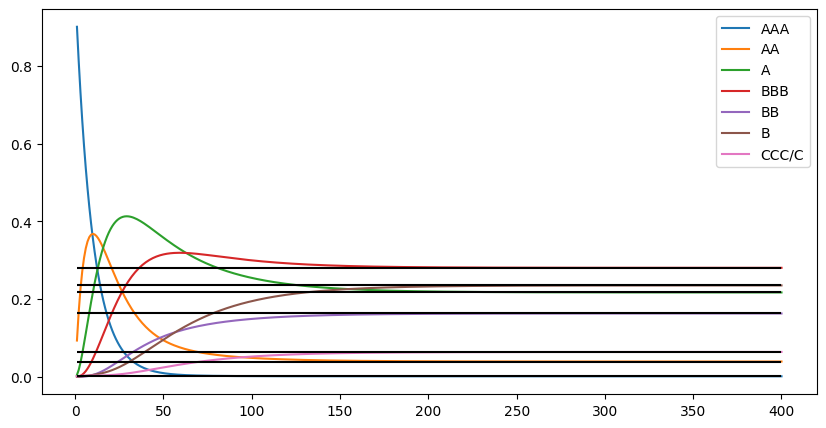

In [ ]:
limit_vectors = np.zeros((Y, m))
for i in range(1, Y + 1):
  limit_vectors[i - 1] = tau @ np.linalg.matrix_power(P, i)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.linspace(1, Y, num=Y), limit_vectors)
ax.hlines(steady_state, 1, Y, color="black")
ax.legend(RATINGS)

## State Distribution Evolution

In [ ]:
YEARS = 20

Sika AG is rated A by S&P.

In [ ]:
m = P.shape[0]
sika_state = np.zeros(m)
sika_state[2] = 1
sika_state

array([0., 0., 1., 0., 0., 0., 0.])

Plot the evolution of Sika AG's rating distribution

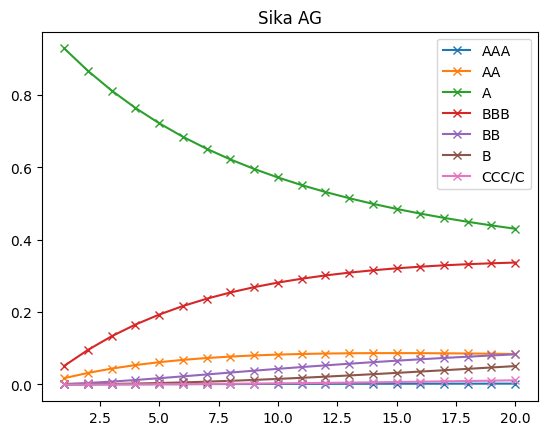

In [ ]:
sika_evolution = np.zeros((YEARS, m))
for i in range(1, YEARS + 1):
  sika_evolution[i - 1] = sika_state @ np.linalg.matrix_power(P, i)
fig, ax = plt.subplots()
ax.set_title("Sika AG")
ax.plot(np.linspace(1, YEARS, num=YEARS), sika_evolution, marker='x')
ax.legend(RATINGS)

In [ ]:
sika_evolution[4]

array([7.12355066e-04, 6.16342577e-02, 7.22327926e-01, 1.93299935e-01,
       1.73032899e-02, 4.03472774e-03, 6.87509409e-04])

In [ ]:
np.sum(sika_evolution[4,:2]) * 100

6.234661278862992

In [ ]:
np.sum(sika_evolution[4,4:]) * 100

2.202552700298486

In [ ]:
np.sum(sika_evolution[4,3:]) * 100

21.532546160855624

AkzoNobel diberikan rating BBB oleh S&P, make vektor *state* awalnya adalah

In [ ]:
m = P.shape[0]
akzo_state = np.zeros(m)
akzo_state[3] = 1
akzo_state

array([0., 0., 0., 1., 0., 0., 0.])

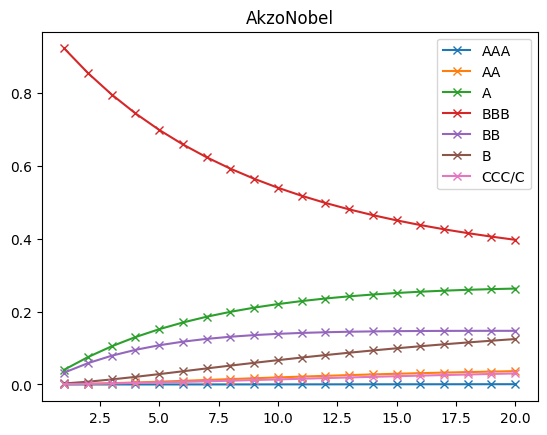

In [ ]:
akzo_evolution = np.zeros((YEARS, m))
for i in range(1, YEARS + 1):
  akzo_evolution[i - 1] = akzo_state @ np.linalg.matrix_power(P, i)
fig, ax = plt.subplots()
ax.set_title("AkzoNobel")
ax.plot(np.linspace(1, YEARS, num=YEARS), akzo_evolution, marker='x')
ax.legend(RATINGS)

In [ ]:
akzo_evolution[4]

array([6.07571072e-05, 7.70704963e-03, 1.51745244e-01, 6.98807943e-01,
       1.07676393e-01, 2.84522425e-02, 5.55037135e-03])

In [ ]:
np.sum(akzo_evolution[4,:3]) * 100

15.95130502741422

In [ ]:
np.sum(akzo_evolution[4,5:]) * 100

3.4002613846328313

In [ ]:
np.sum(akzo_evolution[4,4:]) * 100

14.167900643408974

## Simulation

Simulates a Markov chain given:
* `P`: The transition state
* `s`: The index of the starting state
* `n`: The number of timesteps to perform the Markov chain
* `N`: The number of times to repeat the Markov chain

In [ ]:
def simulate(P, s, n, N):
  count = np.zeros(P.shape[0])
  P_c = np.cumsum(P, axis=1)
  s_0 = s
  for i in range(N):
    s = s_0
    r = np.random.random_sample(n)
    for j in r:
      for pi, p in enumerate(P_c[s,:]):
        if j < p:
          s = pi
          break
    count[s] += 1
  dist = count / np.sum(count)
  return dist

In [ ]:
simulate(P, 2, 5, 9000000)

array([7.05000000e-04, 6.16158889e-02, 7.22651556e-01, 1.93082000e-01,
       1.72467778e-02, 4.02555556e-03, 6.73222222e-04])

In [ ]:
simulate(P, 3, 5, 9000000)

array([5.96666667e-05, 7.71411111e-03, 1.51878556e-01, 6.98600778e-01,
       1.07730889e-01, 2.84921111e-02, 5.52388889e-03])